In [154]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [155]:
df = pd.read_csv('1.04. Real-life example.csv')
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [156]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [157]:
# drop
df_drop = df.drop('Model', axis=1)
df_drop.dropna(axis=0)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


In [158]:
df_drop.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


# PDFs

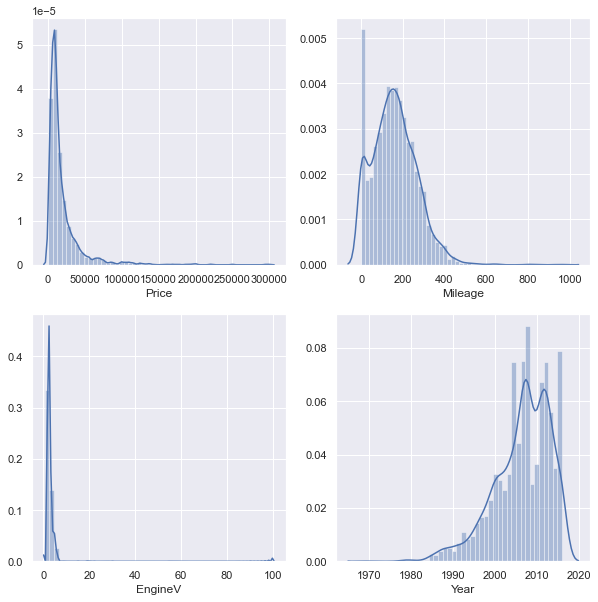

In [159]:
continous = ['Price', 'Mileage', 'EngineV', 'Year']
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for i in range(len(continous)):
    ax = fig.add_subplot(2, 2, i+1)
    ax = sns.distplot(df_drop[continous[i]])

In [160]:
df_2 = df_drop[df_drop['Price'] < df_drop['Price'].quantile(0.99)]
df_3 = df_2[df_2['EngineV'] < 6.5]
df_4 = df_3[df_3['Mileage'] < df_3['Mileage'].quantile(0.99)]
df_5 = df_4[df_4['Year'] > df_4['Year'].quantile(0.01)]

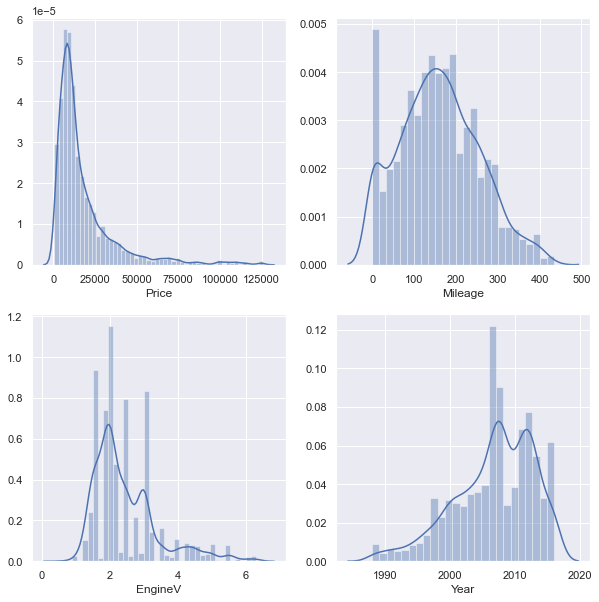

In [161]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for i in range(len(continous)):
    ax = fig.add_subplot(2, 2, i+1)
    ax = sns.distplot(df_5[continous[i]])

In [162]:
data_cleaned = df_5.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866,3866.00000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1466,NaN,NaN,1807,3504,NaN
mean,NaN,18165.736707,NaN,160.583549,2.449780,NaN,NaN,2006.70745
std,NaN,19004.574945,NaN,95.611649,0.948603,NaN,NaN,6.10283
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.00000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.00000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.00000
75%,NaN,21675.000000,NaN,225.000000,3.000000,NaN,NaN,2012.00000


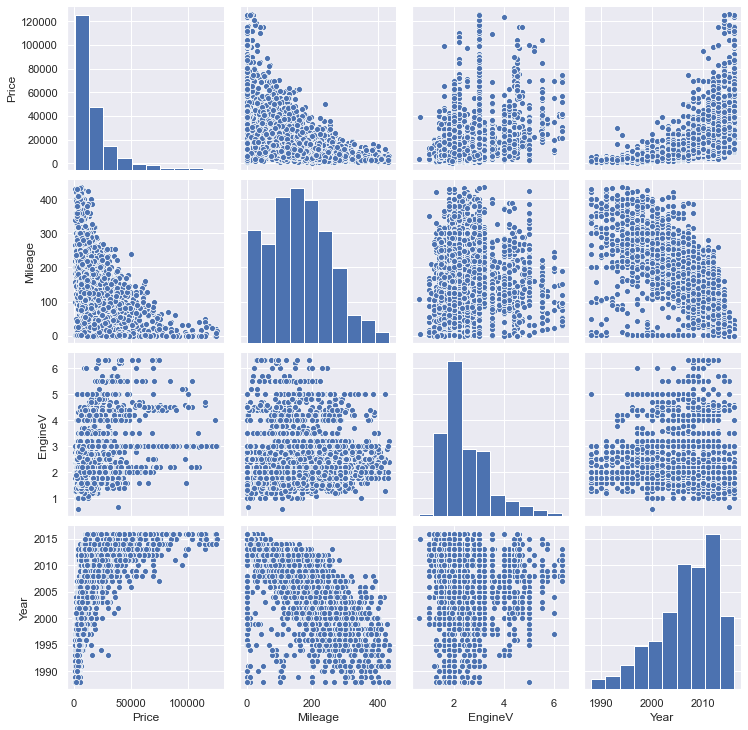

In [163]:
#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16,4))
#ax1.scatter(df_cleaned[''])
sns.pairplot(data_cleaned)

In [164]:
data_cleaned['log_Price'] = np.log(data_cleaned['Price'])
data_cleaned = data_cleaned.drop('Price', axis=1)

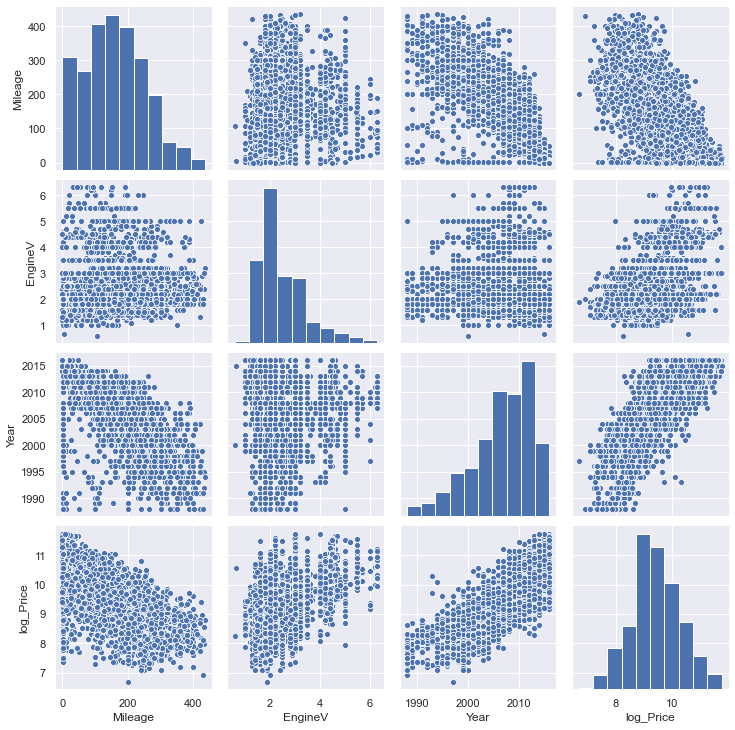

In [165]:
sns.pairplot(data_cleaned)

In [166]:
# we should check for multicollinearity between year and mileage
# older car tends to have higher mileage
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [167]:
vif
#drop vif that higer than 10 #read more

,VIF,Features
0,3.794386,Mileage
1,10.354683,Year
2,7.669288,EngineV


In [168]:
data_cleaned = data_cleaned.drop('Year', axis=1)

In [169]:
# Data preprocessing
data_dummies = pd.get_dummies(data_cleaned, drop_first=True)
data_dummies

,Mileage,EngineV,log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3862,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3863,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3864,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [170]:
col = ['log_Price', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

In [171]:
data_preprocessing = data_dummies[col]

In [172]:
y = data_preprocessing['log_Price']
X = data_preprocessing.drop('log_Price', axis=1)


In [173]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(X)

StandardScaler()

In [174]:
X_scaled = scalar.transform(X)
X_scaled

array([[ 1.21775444, -0.47421142,  2.28154716, ..., -0.16211373,
         1.33315372,  0.32141951],
       [ 2.78680387,  0.47467503, -0.43829907, ..., -0.16211373,
        -0.75010104,  0.32141951],
       [ 2.06504113,  2.68874342, -0.43829907, ..., -0.16211373,
        -0.75010104,  0.32141951],
       ...,
       [-1.58561387,  0.58010686, -0.43829907, ..., -0.16211373,
        -0.75010104,  0.32141951],
       [-1.66929651,  1.107266  ,  2.28154716, ..., -0.16211373,
         1.33315372,  0.32141951],
       [-0.38267598, -0.47421142, -0.43829907, ..., -0.16211373,
        -0.75010104,  0.32141951]])

In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [176]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [177]:
y_hat = reg.predict(X_train)

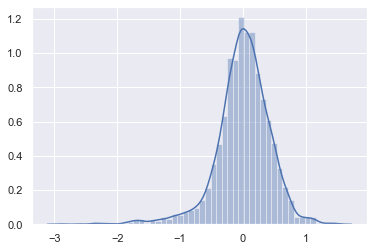

In [178]:
sns.distplot([y_train] - y_hat)

In [179]:
reg.score(X_train, y_train)

0.7529747298842128

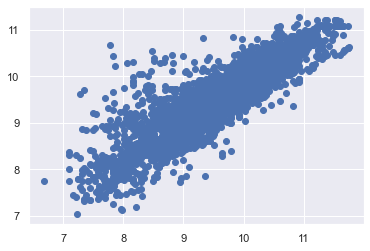

In [180]:
plt.scatter(y_train, y_hat)

In [181]:
reg.intercept_

9.416014436051082

In [182]:
show = pd.DataFrame(X.columns.values, columns=['Features'])
show['Coefficient'] = reg.coef_
show

,Features,Coefficient
0,Mileage,-0.455007
1,EngineV,0.216275
2,Brand_BMW,0.008327
3,Brand_Mercedes-Benz,0.003457
4,Brand_Mitsubishi,-0.140096
5,Brand_Renault,-0.183024
6,Brand_Toyota,-0.064871
7,Brand_Volkswagen,-0.090529
8,Body_hatch,-0.139659
9,Body_other,-0.099957


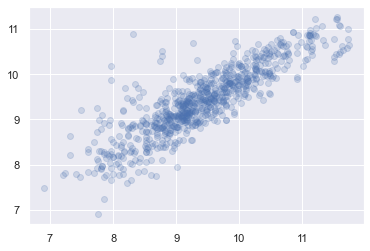

In [185]:
y_hat_test = reg.predict(X_test)
plt.scatter(y_test, y_hat_test, alpha=0.2)

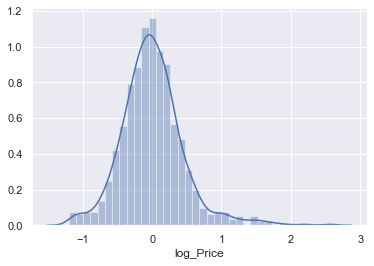

In [190]:
sns.distplot(y_hat_test-y_test)

In [191]:
show2 = pd.DataFrame({
    'Prediction': np.exp(y_hat_test),
    'Target': np.exp(y_test)
})

In [199]:
show2['Residual'] = show2.iloc[:,0]- show2.iloc[:,1]
show2

,Prediction,Target,Residual
2323,2510.346446,4400.0,-1889.653554
1419,19173.589505,22800.0,-3626.410495
2477,7218.367375,4600.0,2618.367375
1583,36788.891362,46900.0,-10111.108638
952,7216.800132,5400.0,1816.800132
...,...,...,...
2250,15951.335511,11800.0,4151.335511
3531,14717.959621,17800.0,-3082.040379
2446,9940.057139,9700.0,240.057139
2800,6007.624197,7300.0,-1292.375803
